# Esercizio

Data la matrice di transizione
<br>
\begin{bmatrix}
0 & \frac{1}{4} & \frac{3}{4} \\
0 & \frac{1}{2} & \frac{1}{2} \\
\frac{3}{4} & 0 & \frac{1}{4} \\
\end{bmatrix}
<br>
- Dimostrare che ha un’unica distribuzione stazionaria **$\pi$** ;
- Determinarla analiticamente ;
- Determinarla con il metodo Monte Carlo e confrontare i risultati ottenuti ;

# Punto 1

Allo stato attuale abbiamo i seguenti stati comunicanti:

- 1->2, 1->3<br>
- 2->2, 2->3<br>
- 3->1, 3->3<br>

Per transisitività si ha che anche i seguenti stati sono comunicanti:

- 1->1 (poichè 1->3 e 3->1)<br>
- 2->1 (poichè 2->3 e 3->1)<br>
- 3->2 (poichè 3->1 e 1->2)<br>

Dato che tutti gli stati comunicano tra loro P si dice **irriducibile**.

La matrice è anche **regolare** dato che almeno un elemento nella diagonale principale è positivo.
Possiamo anche verificare che P sia **regolare** come segue:

In [1]:
import numpy as np

P = np.array([
    [0, 1/4, 3/4],
    [0, 1/2, 1/2],
    [3/4, 0, 1/4]
])

print(f'Matrice di transizione: \n\n{P}\n')
print(f'Matrice di transizione al passo 2: \n\n{P@P}\n')
print('Poichè la matrice di transizione al passo 2 (TUTTI ALLO STESSO STATO N) ha tutti valori positivi, essa sarà regolare')

Matrice di transizione: 

[[0.   0.25 0.75]
 [0.   0.5  0.5 ]
 [0.75 0.   0.25]]

Matrice di transizione al passo 2: 

[[0.5625 0.125  0.3125]
 [0.375  0.25   0.375 ]
 [0.1875 0.1875 0.625 ]]

Poichè la matrice di transizione al passo 2 (TUTTI ALLO STESSO STATO N) ha tutti valori positivi, essa sarà regolare


Vale la seguente

### Proprietà : 

se P è **irriducibile** ed E è finito, allora la distribuzione stazionaria $\pi$ è unica

Possiamo inoltre affermare che P è regolare poichè vale il seguente

### Criterio di regolarità :

se P è **irriducibile** ed almeno un elemento nella diagonale principale risulta > 0, allora P è regolare (COME GIÀ DETTO)

Possiamo applicare in oltre, pure il seguente teorema: 

### Teorema di Markov

Se P è **regolare** ed E è finito, allora la catena ha un'unica distribuzione stazionaria $\pi$

# Punto 2 

## Metodo Algebrico

In [2]:
# eigenvalues restituisce una tupla contenente un array degli autovalori e una matrice degli autovettori.
lam, V = np.linalg.eig(P.T) # P è trasposta perchè voglio gli autovettori sinistri

print(f'Autovalori: {lam}\n')
print(f'Matrice le cui colonne sono gli autovettori: \n\n{V}\n')

# Per la distribuzione stazionaria prendo la colonna corrispondente all'autovalore 1 (la seconda)
v = V[:,1] / np.sum(V[:,1]) #normalizzo
print(f'Distribuzione stazionaria: {np.round(v, 3)}')

Autovalori: [-0.57569391  1.          0.32569391]

Matrice le cui colonne sono gli autovettori: 

[[ 0.78010553 -0.57469577  0.55506939]
 [-0.18130286 -0.28734789 -0.79611302]
 [-0.59880267 -0.76626103  0.24104363]]

Distribuzione stazionaria: [0.353 0.176 0.471]


# Punto 3

## Metodo Monte Carlo

In [3]:
n = np.size(P[0]) # dimensione di E
F = np.zeros(n) # Vettore della frequeza di realizzazione degli stati di E

N = 1000000
j0 = np.random.randint(1, n) # Step 1
F[j0] = 1

for i in range(N):
    jk = np.random.multinomial(1, P[j0,:]) # Step 2
    j0 = np.nonzero(jk)[0][0]
    F[j0] += 1

v = F/N # normalizzo per ottenere le probabilità dalle frequenze
print(f'Distribuzione stazionaria: {np.round(v, 3)}')

Distribuzione stazionaria: [0.352 0.177 0.471]


# Passeggiata aleatoria su un grafo

Determinare la matrice di transizione della catena di Markov associata.
- Dimostrare che la catena è regolare
- Determinare la distribuzione invariante sia analiticamente che con il metodo Monte
Carlo.

In [4]:
import matplotlib.pyplot as plt

P = np.array([[0, 1/3, 0, 1/3, 1/3],
              [1/3, 0, 1/3, 0, 1/3],
              [0, 1/3, 0, 1/3, 1/3],
              [1/3, 0, 1/3, 0, 1/3],
              [1/4, 1/4, 1/4, 1/4, 0]]) 

print(f'Matrice di transizione: \n\n{P}\n')
print(f'Matrice di transizione al passo 2: \n\n{P@P}\n')

print("Avendo tutti valori non nulli al passo 2, P è regolare.\n")
print("Inoltre, essendo E finito, dimostro che ha un'unica distribuzione stazionaria k\n")
print("k = k1+k2+k3+k4+k5 = 3+3+3+3+4 = 16") # sommo il numero di adiacenti
print("v1=v2=v3=v4 = 3/16\nv5 = 4/16") # numero di adiacenti/distribuzione stazionaria

Matrice di transizione: 

[[0.         0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.         0.33333333]
 [0.         0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.         0.33333333]
 [0.25       0.25       0.25       0.25       0.        ]]

Matrice di transizione al passo 2: 

[[0.30555556 0.08333333 0.30555556 0.08333333 0.22222222]
 [0.08333333 0.30555556 0.08333333 0.30555556 0.22222222]
 [0.30555556 0.08333333 0.30555556 0.08333333 0.22222222]
 [0.08333333 0.30555556 0.08333333 0.30555556 0.22222222]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.33333333]]

Avendo tutti valori non nulli al passo 2, P è regolare.

Inoltre, essendo E finito, dimostro che ha un'unica distribuzione stazionaria k

k = k1+k2+k3+k4+k5 = 3+3+3+3+4 = 16
v1=v2=v3=v4 = 3/16
v5 = 4/16


## Metodo algebrico

In [5]:
lam, V = np.linalg.eig(P.T)

print(f'Autovalori: \n{np.round(np.real(lam),2)}\n')
print(f'Matrice le cui colonne sono gli autovettori: \n{np.round(np.real(V), 2)}\n')

v = V[:,0]/np.sum(V[:,0])
print(f'Distribuzione stazionaria: {np.round(np.real(v), 2)}')

Autovalori: 
[ 1.   -0.67 -0.33  0.    0.  ]

Matrice le cui colonne sono gli autovettori: 
[[ 0.42  0.5   0.22  0.26  0.26]
 [ 0.42 -0.5   0.22 -0.51 -0.51]
 [ 0.42  0.5   0.22 -0.26 -0.26]
 [ 0.42 -0.5   0.22  0.51  0.51]
 [ 0.55  0.   -0.89 -0.   -0.  ]]

Distribuzione stazionaria: [0.19 0.19 0.19 0.19 0.25]


## Metodo Monte Carlo

In [6]:
n = P[0].size
F = np.zeros(n)
N = 1000000

j = np.random.randint(1, n)
F[j] = 1

for i in range(N):
    multi = np.random.multinomial(1, P[j])
    j = np.nonzero(multi)[0][0]
    F[j] += 1
    
v = F/N
print(f'Distribuzione stazionaria: {np.round(np.real(v), 2)}')

Distribuzione stazionaria: [0.19 0.19 0.19 0.19 0.25]


In [7]:
def multinomiale(n, p):
    M = np.zeros(len(p))
    F = np.cumsum(p)
    for _ in range(n):
        xi = np.random.rand()
        x = np.nonzero(xi < F)[0][0] # indice della partizione in cui ricade il numero random
        M[x]+=1
    return M

In [8]:
n = P[0].size
F = np.zeros(n)
N = 100000

j = np.random.randint(0, n)
F[j] = 1

for i in range(N):
    multi = multinomiale(1, P[j])
    j = np.nonzero(multi)[0][0]
    F[j] += 1
    
v = F/N
print(f'Distribuzione stazionaria: {np.round(np.real(v), 2)}')

Distribuzione stazionaria: [0.19 0.19 0.19 0.19 0.25]


# Catene di nascita e di morte

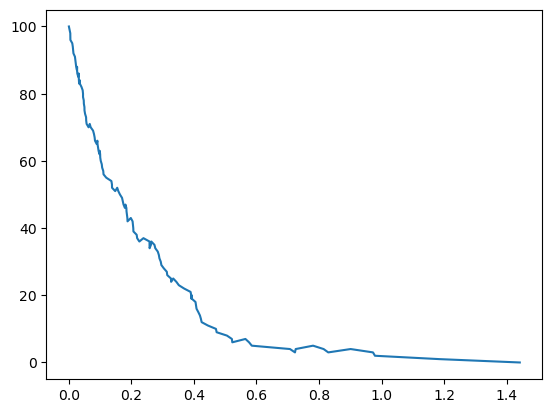

In [9]:
n0,lam,mu,T = 100,1,5,5

t = np.array([0])
x = np.array([n0])
time, i = 0,0
while time <= T:
    if x[i]==0:
        break
    r = np.random.rand()
    time -= np.log(r)/(lam*x[i]+mu*x[i])
    s = np.random.rand()
    if s < lam/(lam+mu):
        x = np.append(x, x[i]+1)
    else:
        x = np.append(x, x[i]-1)
    t = np.append(t, time)
    i += 1

plt.plot(t, x)
plt.show()